__Submitted By__ 

Name - Adarsh Ghimire

Student ID - 100058927

Subject - Machine Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_path = "drive/MyDrive/COSC 606 Machine learning/COVID-19_Daily_Testing.csv"
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     object
 3   Cases                                         89 non-null     object
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

In [ ]:
# To replace commas from the numbers and converting the object type to integer type
# Concerned only about Tests done as feature and Cases found as target
# The regression problem will be focused on the basis of finding relation between tests done and cases found.
df['Cases'] = df['Cases'].str.replace(',', '')
df['Tests'] = df['Tests'].str.replace(',', '')
df['Cases'] = pd.to_numeric(df['Cases']) 
df['Tests'] = pd.to_numeric(df['Tests'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     int64 
 3   Cases                                         89 non-null     int64 
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

In [ ]:
data_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

In [ ]:
X = df['Tests'].values.reshape(-1,1)
y = df['Cases'].values.reshape(-1,1)

In [ ]:
print(X.shape)
print(y.shape)

(89, 1)
(89, 1)


### Linear Regression Model with out any feature manipulations

The linear model is: Y = 97.777 + 0.18572X


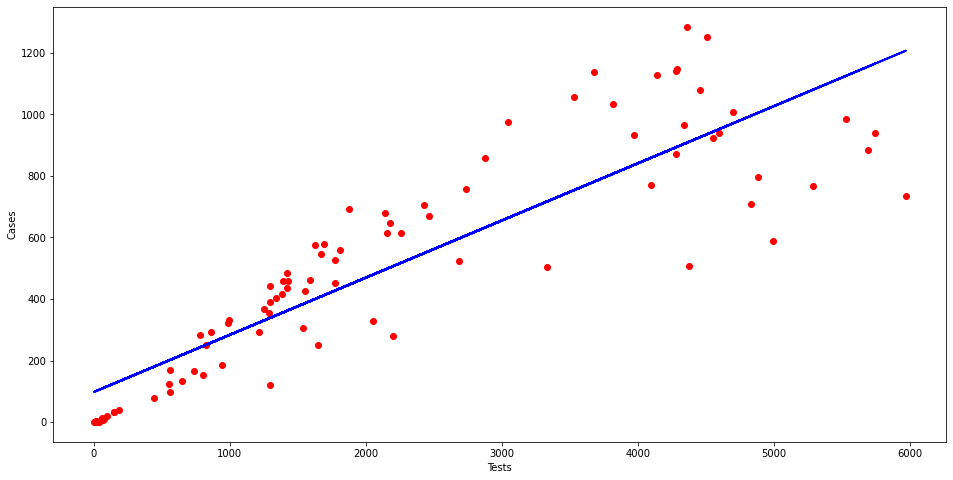

In [ ]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))

plt.scatter(X, y, c='red')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [ ]:
print('RMSE for Linear Regression : ',np.sqrt(mean_squared_error(y,predictions)))

RMSE for Linear Regression :  171.79768160540917


The RMSE calculated with the Linear regression without any feature manipulation is __171.79__

______

### Linear Regression with just feature scaling

In [ ]:
# Feature Scaling, which means changing values from 0 to 1
X_scaled = (X - min(X))/(max(X)-min(X))
print(X_scaled[:3])

[[0.        ]
 [0.40703518]
 [0.68626466]]


The linear model is: Y = 97.963 + 1108.8X


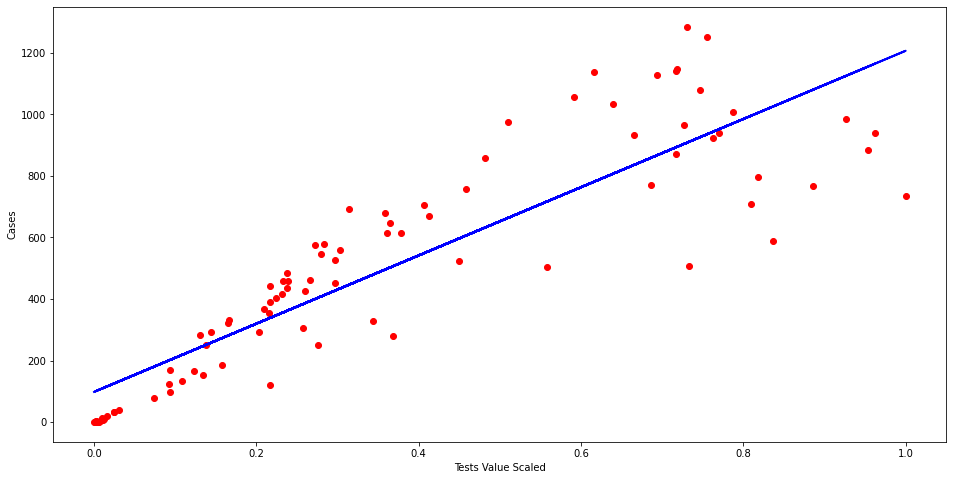

In [ ]:
reg_scaled = LinearRegression()
reg_scaled.fit(X_scaled, y)
predictions_scaled = reg_scaled.predict(X_scaled)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg_scaled.intercept_[0], reg_scaled.coef_[0][0]))
plt.figure(figsize=(16, 8))

plt.scatter(X_scaled, y, c='red')
plt.plot(X_scaled, predictions_scaled, c='blue', linewidth=2)
plt.xlabel("Tests Value Scaled")
plt.ylabel("Cases")
plt.show()

In [ ]:
print('RMSE for Linear Regression : ',np.sqrt(mean_squared_error(y, predictions_scaled)))

RMSE for Linear Regression :  171.79768160540914


The RMSE calculated with the Linear regression with feature scaled is __171.7976__

_______

### Linear Regression with just feature normalization

In [ ]:
# Feature Normalization, which means changing feature values such that distribution is normal.
X_normalized = (X - np.mean(X))/(max(X)-min(X))
print(X_normalized[:3])

[[-0.36255811]
 [ 0.04447707]
 [ 0.32370655]]


The linear model is: Y = 499.96 + 1108.8X


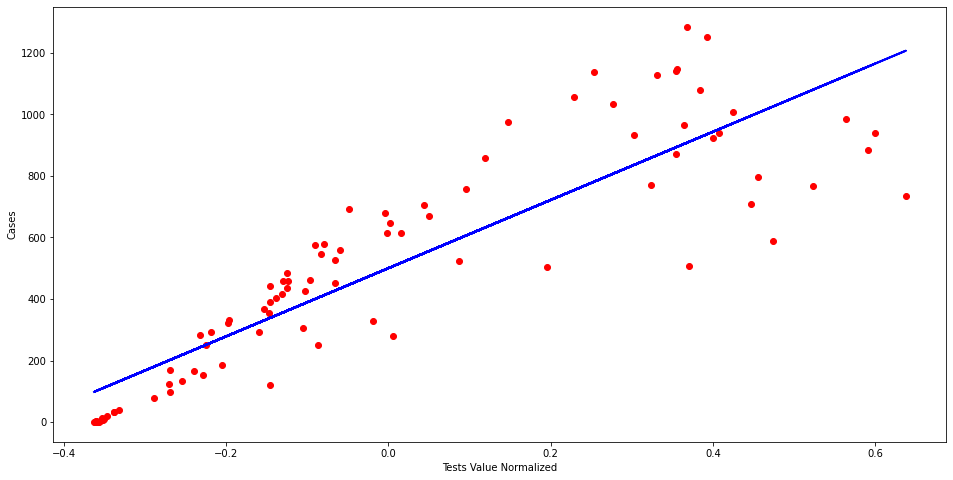

In [ ]:
reg_normalized = LinearRegression()
reg_normalized.fit(X_normalized, y)
predictions_normalized = reg_normalized.predict(X_normalized)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg_normalized.intercept_[0], reg_normalized.coef_[0][0]))
plt.figure(figsize=(16, 8))

plt.scatter(X_normalized, y, c='red')
plt.plot(X_normalized, predictions_normalized, c='blue', linewidth=2)
plt.xlabel("Tests Value Normalized")
plt.ylabel("Cases")
plt.show()

In [ ]:
print('RMSE for Linear Regression : ',np.sqrt(mean_squared_error(y, predictions_normalized)))

RMSE for Linear Regression :  171.79768160540917


The RMSE calculated with the Linear regression with feature normalized is __171.7976__
__________

### Linear Regression with just feature standardization

In [ ]:
# Feature Standardization, which means changing feature values such that distribution is normal and standarzied by the standard deviation.
X_std = (X - np.mean(X))/(np.std(X))
print(X_std[:3])

[[-1.25398817]
 [ 0.15383387]
 [ 1.11961137]]


The linear model is: Y = 499.96 + 320.57X


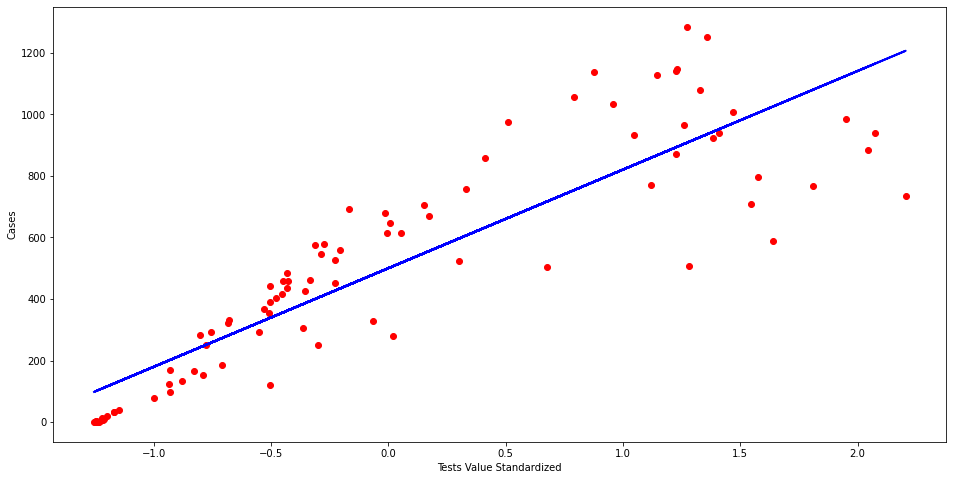

In [ ]:
reg_std = LinearRegression()
reg_std.fit(X_std, y)
predictions_std = reg_std.predict(X_std)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg_std.intercept_[0], reg_std.coef_[0][0]))
plt.figure(figsize=(16, 8))

plt.scatter(X_std, y, c='red')
plt.plot(X_std, predictions_std, c='blue', linewidth=2)
plt.xlabel("Tests Value Standardized")
plt.ylabel("Cases")
plt.show()

In [ ]:
print('RMSE for Linear Regression : ',np.sqrt(mean_squared_error(y, predictions_std)))

RMSE for Linear Regression :  171.79768160540917


The RMSE calculated with the Linear regression with feature normalized is __171.7976__

_____


The feature standarizations, normalizations, and scaling, have not affected the regression problem at hand. Because the linear regression problem is only univariate, and the scikit-learn uses the least square technique to compute linear regression model. Thus, all the feature manipulation techniques do not affect the overall result of the system. However, it would have affected if only we have used the gradient descent approach to compute the regression model.

### Polynomial Regression

#### Polynomial regression with degree 4

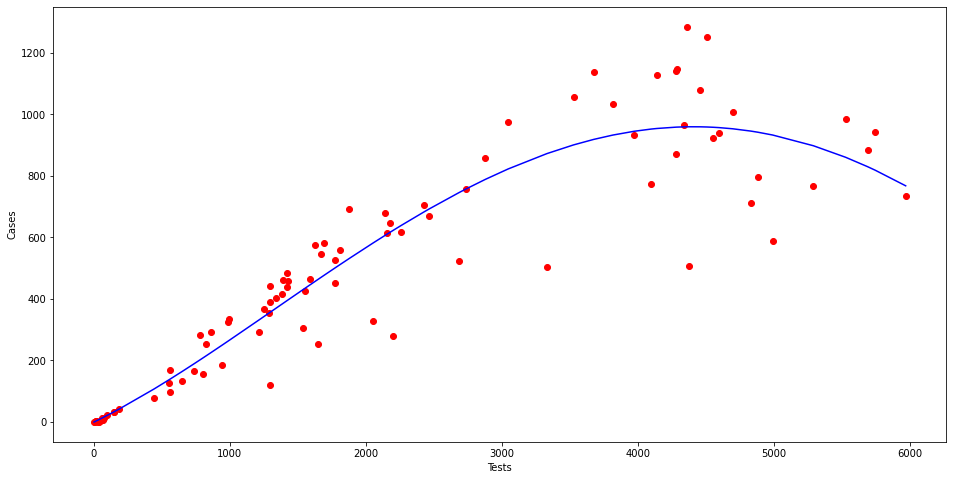

RMSE for Linear Regression=> 131.076775703435


In [ ]:
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='red')
plt.plot(new_X, new_y, c='blue')
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,lin2.predict(poly.fit_transform(X)))))

#### Polynomial regression with degree 3

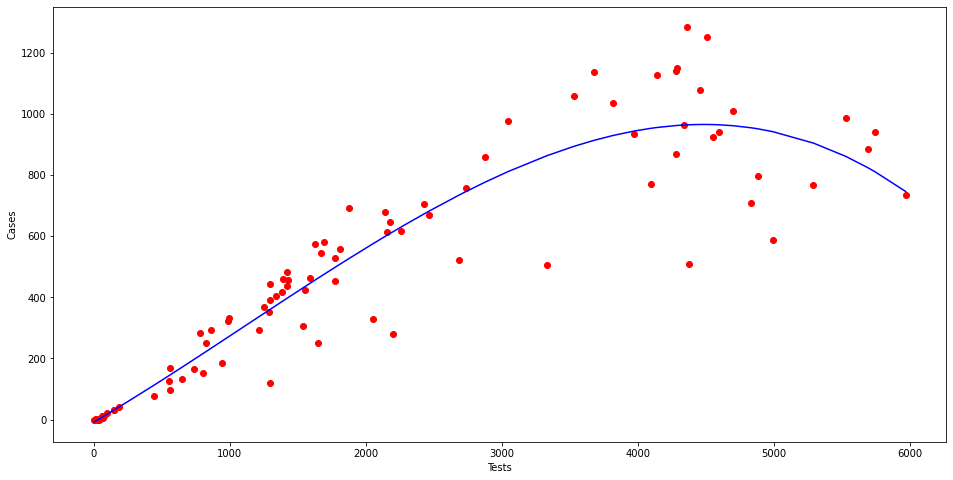

RMSE for Linear Regression=> 131.2391556826983


In [ ]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='red')
plt.plot(new_X, new_y, c='blue')
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,lin2.predict(poly.fit_transform(X)))))

#### Polynomial regression with degree 2

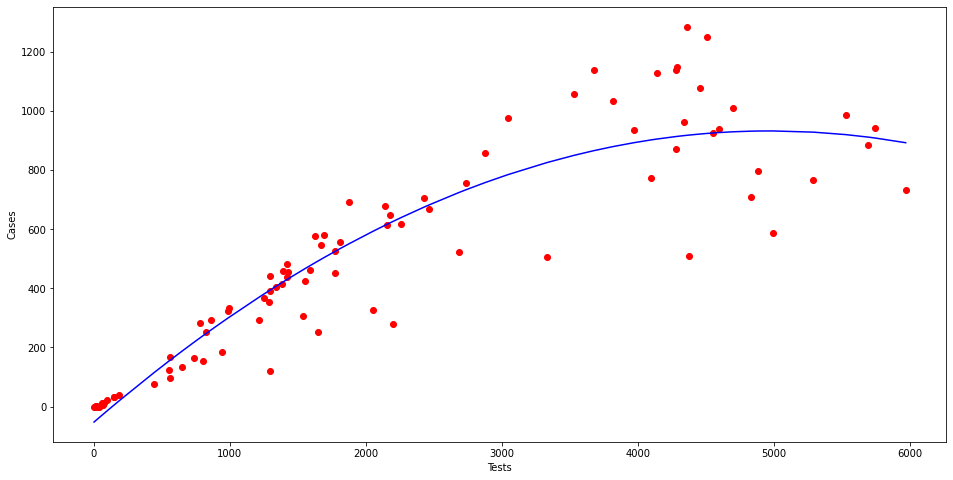

RMSE for Linear Regression=> 136.7701535452868


In [ ]:
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='red')
plt.plot(new_X, new_y, c='blue')
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,lin2.predict(poly.fit_transform(X)))))

The regression model based on degree of polynomial can be seen to have produced varying RMSE score, because of the fact that the higher order polynomials curves are much complex and can easily fit the data, however the lower order polynomials are simple and might not completely fit the data. Thus, need to take into account the consideration for increasing complexity or increasing generalizability of the model.